<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">


# Table of Contents
* Install Detectron2 dependencies
* Download custom Detectron2 object detection data
* Visualize Detectron2 training data
* Write our Detectron2 Training configuration
* Run Detectron2 training
* Evaluate Detectron2 performance
* Run Detectron2 inference on test images



# Install Detectron2 Dependencies

In [1]:
import os

print("Current working directory:", os.getcwd())

Current working directory: /kaggle/working


In [2]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-w8ltd2ap
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-w8ltd2ap
  Resolved https://github.com/facebookresearch/detectron2.git to commit 8c4a333ceb8df05348759443d0206302485890e0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 

In [3]:
# Importing required libraries
import torch
import detectron2

# Retrieving and displaying Torch and CUDA version information
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print(f"Torch version: {TORCH_VERSION}; CUDA version: {CUDA_VERSION}")

# Displaying Detectron2 version information
print(f"Detectron2 version: {detectron2.__version__}")

Torch version: 2.0; CUDA version: 2.0.0
Detectron2 version: 0.6


In [4]:
# Importing necessary libraries
import detectron2
from detectron2.utils.logger import setup_logger

import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

# Setting up Detectron2 logger
setup_logger()

# Importing common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Import and Register Custom Detectron2 Data

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3xqoQhgk2T2SnBmvFHiE")
project = rf.workspace("tfg-2nmge").project("axial-dataset")
dataset = project.version(4).download("coco")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 26.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled opencv-python-headless-4.8.0.76
  Attempting uninstall: idna
    Found

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Axial-Dataset-4 in coco:: 100%|██████████| 560/560 [00:00<00:00, 9107.45it/s]


In [6]:
from detectron2.data.datasets import register_coco_instances

# Register training dataset
train_annotations_path = "/kaggle/working/Axial-Dataset-4/train/_annotations.coco.json"
train_image_root = "/kaggle/working/Axial-Dataset-4/train"
register_coco_instances("my_dataset_train", {}, train_annotations_path, train_image_root)

# # Register validation dataset
# val_annotations_path = "/kaggle/working/Medical-Waste-6/valid/_annotations.coco.json"
# val_image_root = "/kaggle/working/Medical-Waste-6/valid"
# register_coco_instances("my_dataset_val", {}, val_annotations_path, val_image_root)

# Register test dataset
test_annotations_path = "/kaggle/working/Axial-Dataset-4/test/_annotations.coco.json"
test_image_root = "/kaggle/working/Axial-Dataset-4/test"
register_coco_instances("my_dataset_test", {}, test_annotations_path, test_image_root)


WARNING [09/18 09:24:52 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/18 09:24:52 d2.data.datasets.coco]: Loaded 518 images in COCO format from /kaggle/working/Axial-Dataset-4/train/_annotations.coco.json


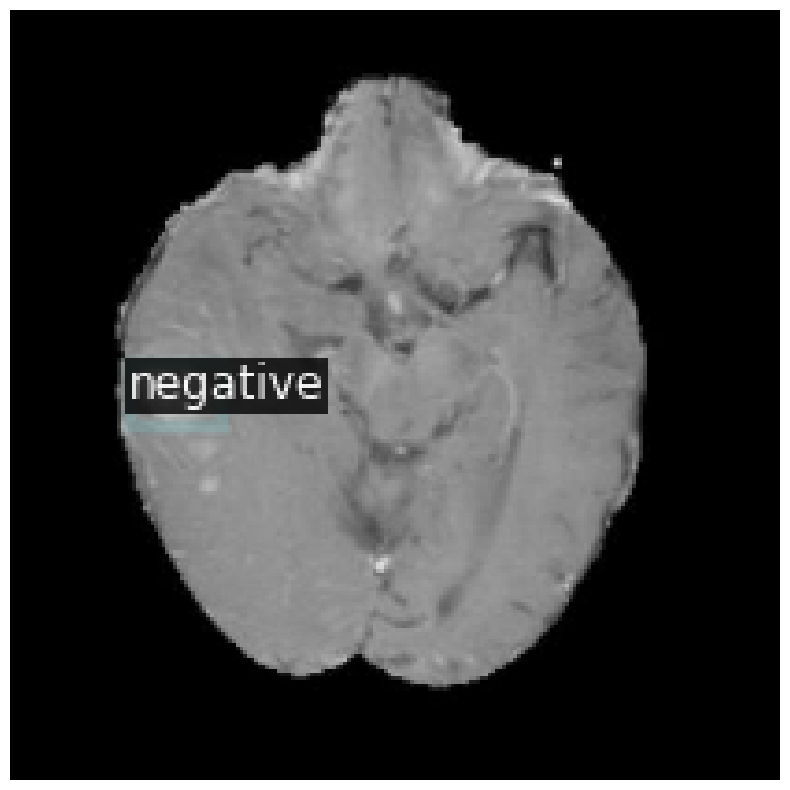

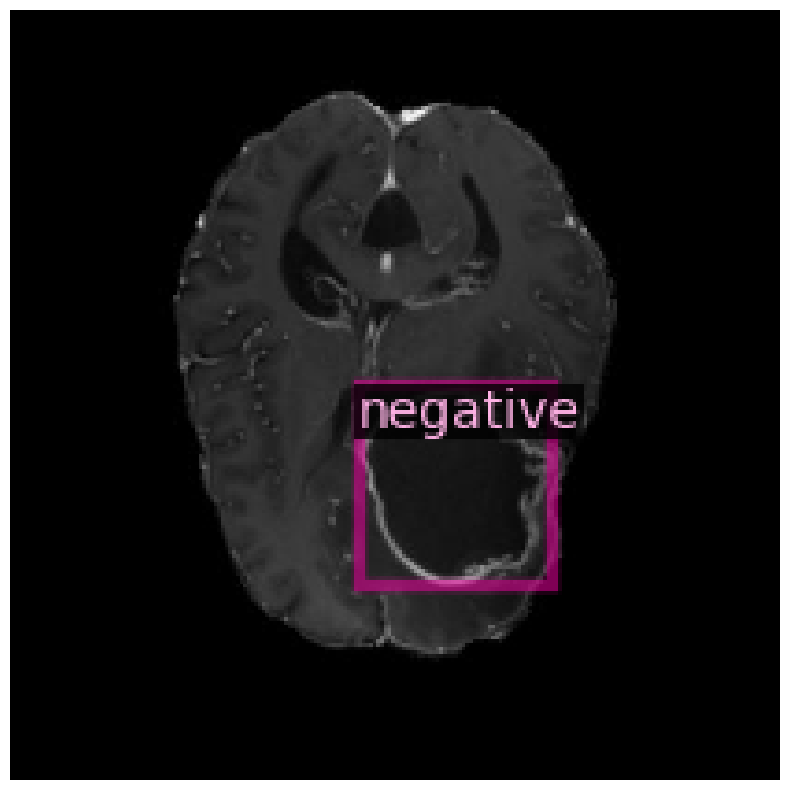

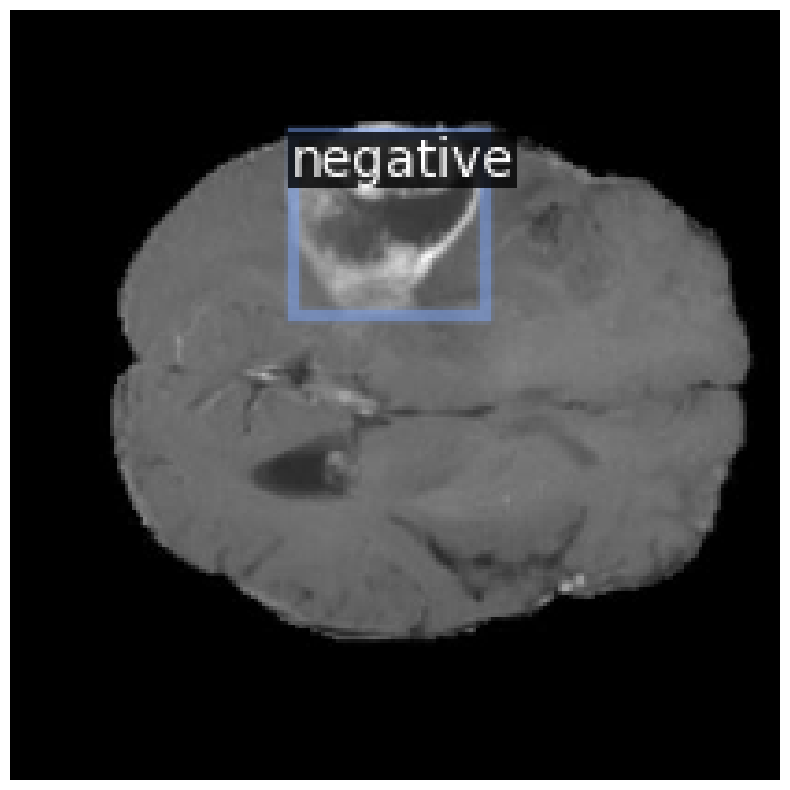

In [7]:
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.axis('off')  
    plt.show()

 # Train Custom Detectron2 Detector

In [8]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        """
        Build and return a COCOEvaluator for validation during training.

        Args:
            cfg (CfgNode): Configuration node for Detectron2.
            dataset_name (str): Name of the dataset.
            output_folder (str): Path to the output folder for evaluation results.

        Returns:
            COCOEvaluator: A COCOEvaluator instance for validation evaluation.
        """
        if output_folder is None:
            os.makedirs("coco_eval", exist_ok=True)
            output_folder = "coco_eval"

        return COCOEvaluator(dataset_name, cfg, False, output_folder)


In [9]:
# Create the configuration object
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_test",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")

# Set training parameters
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 3000
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05

# Set model parameters
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # Your number of classes + 1

# Set evaluation parameters
cfg.TEST.EVAL_PERIOD = 500

# Create output directory if it doesn't exist
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Initialize and train the model
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[09/18 09:26:15 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:01, 258MB/s]                             


[09/18 09:26:18 d2.engine.train_loop]: Starting training from iteration 0


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3483.)


[09/18 09:27:03 d2.utils.events]:  eta: 1:33:50  iter: 19  total_loss: 2.486  loss_cls: 1.966  loss_box_reg: 0.4191  loss_rpn_cls: 0.1125  loss_rpn_loc: 0.007756    time: 1.8503  last_time: 1.8913  data_time: 0.0309  last_data_time: 0.0280   lr: 1.931e-06  max_mem: 6882M
[09/18 09:27:45 d2.utils.events]:  eta: 1:33:09  iter: 39  total_loss: 2.535  loss_cls: 1.915  loss_box_reg: 0.4816  loss_rpn_cls: 0.1155  loss_rpn_loc: 0.007452    time: 1.8161  last_time: 1.1729  data_time: 0.0244  last_data_time: 0.0251   lr: 2.911e-06  max_mem: 6882M
[09/18 09:28:21 d2.utils.events]:  eta: 1:32:30  iter: 59  total_loss: 2.447  loss_cls: 1.803  loss_box_reg: 0.517  loss_rpn_cls: 0.1193  loss_rpn_loc: 0.006868    time: 1.8083  last_time: 1.6043  data_time: 0.0244  last_data_time: 0.0313   lr: 3.891e-06  max_mem: 6883M
[09/18 09:28:57 d2.utils.events]:  eta: 1:31:51  iter: 79  total_loss: 2.3  loss_cls: 1.654  loss_box_reg: 0.5332  loss_rpn_cls: 0.09247  loss_rpn_loc: 0.008494    time: 1.8021  last_ti

In [10]:
#test evaluation
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

[09/18 10:55:19 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...
WARNING [09/18 10:55:20 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [09/18 10:55:20 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/18 10:55:20 d2.data.datasets.coco]: Loaded 36 images in COCO format from /kaggle/working/Axial-Dataset-4/test/_annotations.coco.json
[09/18 10:55:20 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/18 10:55:20 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[09/18 10:55:20 d2.data.common]: Serializing 36 elements to byte tensors and concatenating them all ...
[09/18 10:55:20 d2.data.common]: Se

OrderedDict([('bbox',
              {'AP': 49.1090130428031,
               'AP50': 67.5439336302499,
               'AP75': 53.10725739372531,
               'APs': 45.33003300330032,
               'APm': 53.11053399671529,
               'APl': nan,
               'AP-tumor': nan,
               'AP-negative': 40.032571901937594,
               'AP-positive': 58.18545418366862})])

# Inference with Detectron2 Saved Weights

In [11]:
directory_path = "./output/"
os.listdir(directory_path)

['last_checkpoint',
 'coco_instances_results.json',
 'metrics.json',
 'instances_predictions.pth',
 'events.out.tfevents.1695029229.9867fffec19f.28.0',
 'model_final.pth']

In [12]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")

[09/18 10:55:27 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [18]:
# from detectron2.utils.visualizer import ColorMode
# import glob
# import matplotlib.pyplot as plt

# for imageName in glob.glob('/kaggle/working/Axial-Dataset-4/test/*jpg'):
#     im = cv2.imread(imageName)
#     outputs = predictor(im)
#     v = Visualizer(im[:, :, ::-1],
#                     metadata=test_metadata, 
#                     scale=0.8
#                      )
#     out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
#     # Display the image using Matplotlib
#     plt.figure(figsize=(10, 10))
#     plt.imshow(out.get_image()[:, :, ::-1])
#     plt.axis('off')  # Turn off axis labels and ticks
#     plt.show()  # Show the image using Matplotlib


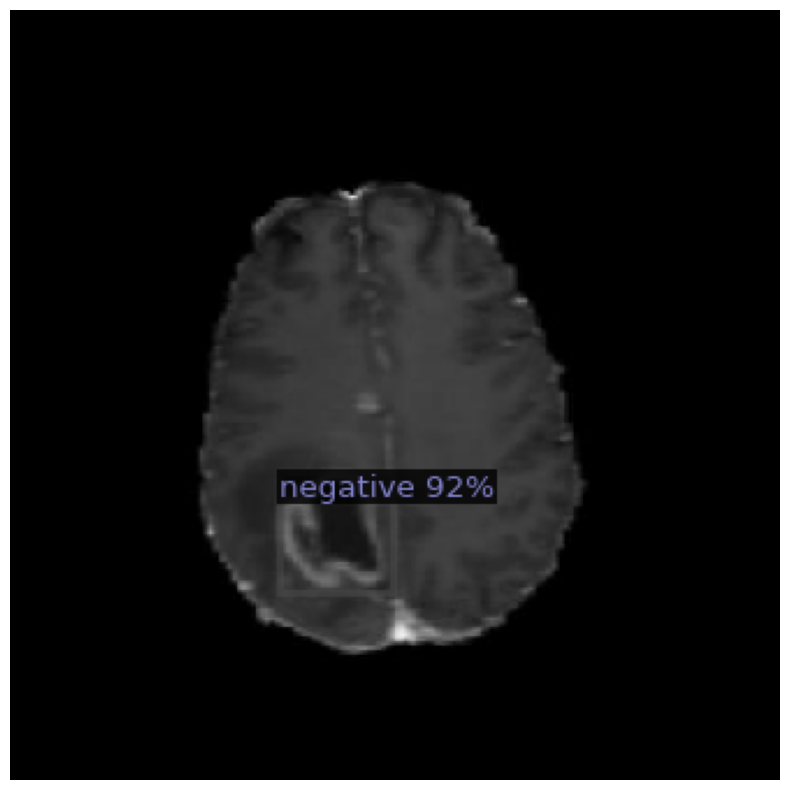

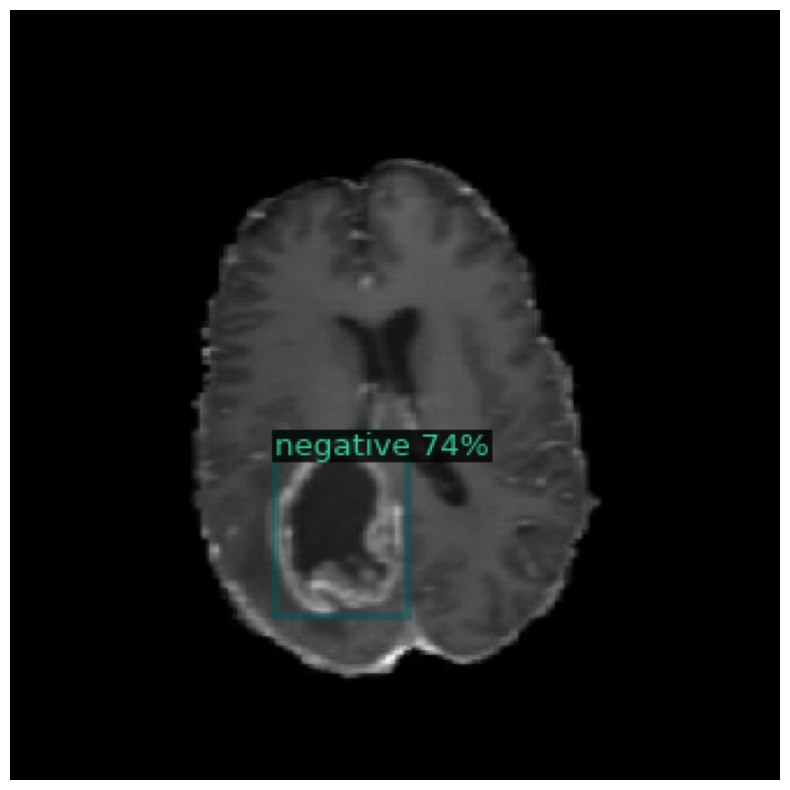

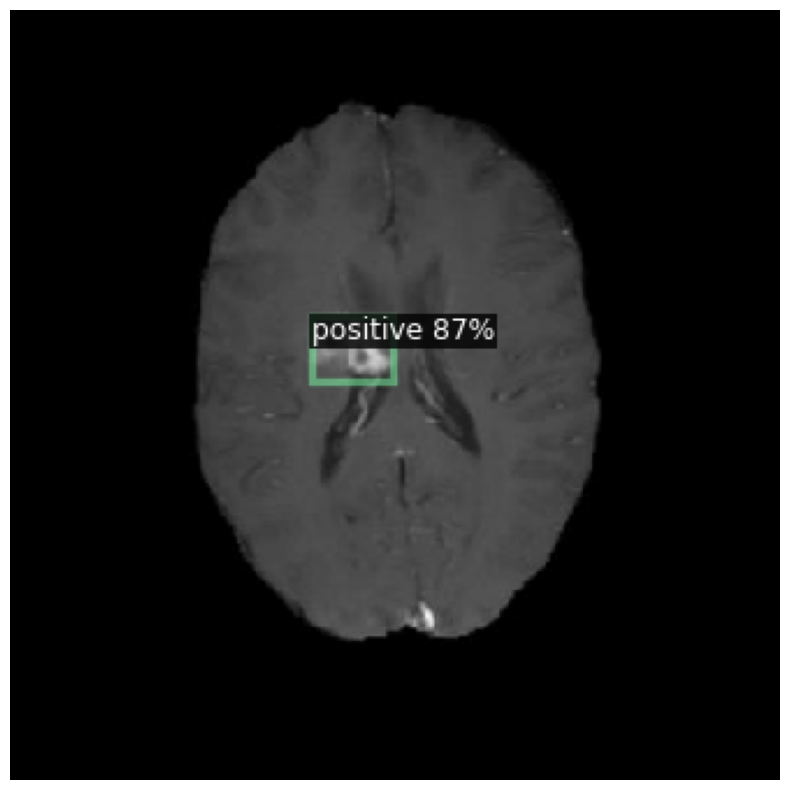

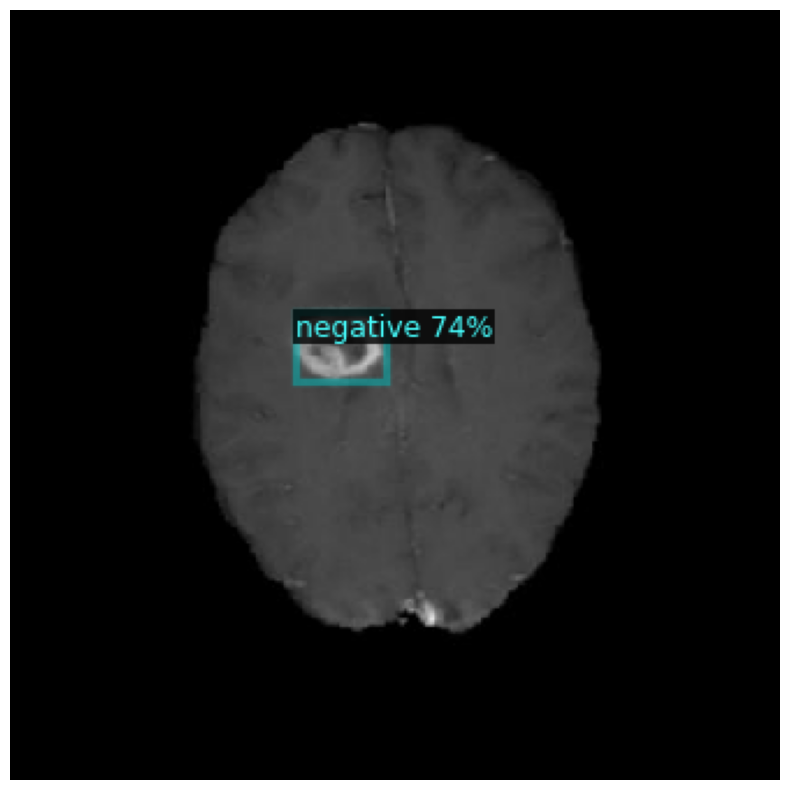

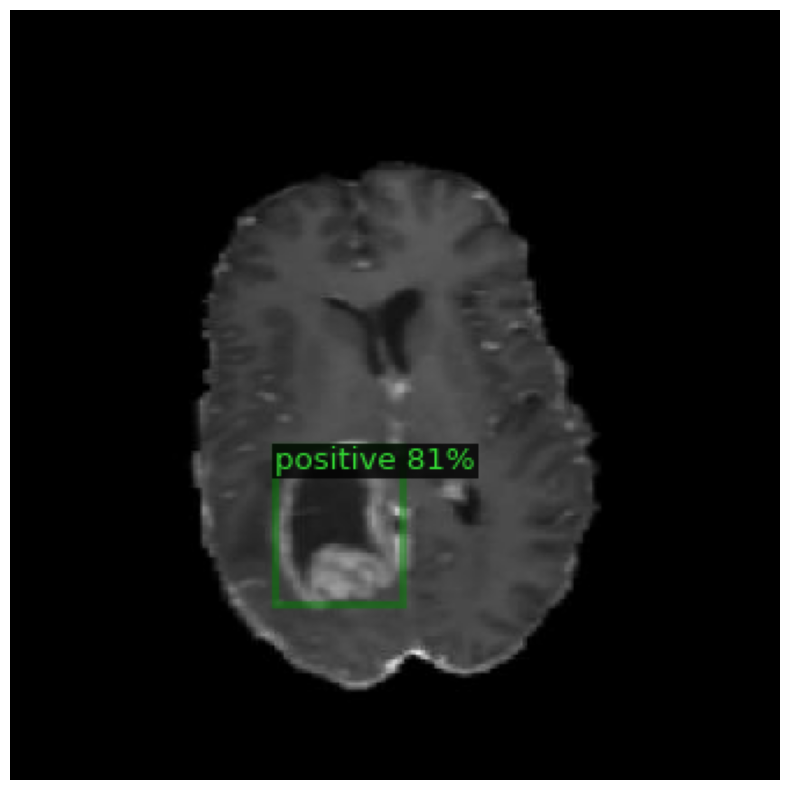

In [17]:
from detectron2.utils.visualizer import ColorMode
import glob
import matplotlib.pyplot as plt
import random

# Get a list of all image file paths
image_paths = glob.glob('/kaggle/working/Axial-Dataset-4/test/*jpg')

# Shuffle the list to select random images
random.shuffle(image_paths)

# Select the first 5 random images (you can change this number)
selected_images = image_paths[:5]

for imageName in selected_images:
    im = cv2.imread(imageName)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                    metadata=test_metadata, 
                    scale=0.8
                     )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
    # Display the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(out.get_image()[:, :, ::-1])
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()  # Show the image using Matplotlib


In [15]:
import zipfile
import os

def zip_folder(folder_path, output_zip_path):
    # Create a ZipFile object in write mode
    with zipfile.ZipFile(output_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory and add all files and subdirectories to the zip file
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                # Add the file to the zip with the appropriate relative path
                zipf.write(file_path, os.path.relpath(file_path, folder_path))

# Specify the folder path you want to zip
folder_to_zip = '/kaggle/working/output'

# Specify the output ZIP file path
output_zip_file = '/kaggle/working/output1.zip'

# Call the function to zip the folder
zip_folder(folder_to_zip, output_zip_file)

print(f"Folder '{folder_to_zip}' has been zipped to '{output_zip_file}'.")


Folder '/kaggle/working/output' has been zipped to '/kaggle/working/output1.zip'.
